# HW 3 MIAMI

In [157]:
from scipy.optimize import linprog
import pandas as pd
import numpy as np
import networkx as nx
import random
import json
import copy
import osmnx as ox
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
%matplotlib inline

In [110]:
import warnings
warnings.filterwarnings("ignore")

In [111]:
# Functions #

##### Can work for a very long time #####
def generate_shops_points():
    polygon = []
    result = []
    i = 0
    
    cycle = 0
    while i < 11:
        a = random.uniform(0, 1000)
        b = random.uniform(0, 1000)
        destination = ox.get_nearest_node(G_miami, (a, b))
        
        if destination in result:
            continue
        result.append(destination)
        polygon.append((a, b))
        i += 1
     
    try:
        # check if path exists
        for i in range(len(result)):
            nx.shortest_path(G_miami, source=result[i], target=destination, weight='length', method='dijkstra')
    except:
        return -1
        
    return result, polygon

def generate_points():
    points = generate_shops_points()
    
    while points == -1:
        points = generate_shops_points()
    
        if points != -1:
            points, coords = points
        
    
    return points, coords

def node_arc_incidence_matrix(m):
    (row, col) = m.shape
    elem = row * col - row
    node_arc = np.zeros((row, elem))
    k = 0
    for i in range (0, row):
        for j in range (0, col):
            if (m[i,j] == 1):
                node_arc[i,k] = 1 #+1
                node_arc[j,k] = -1
                k = k + 1
    return node_arc

def Aeq_constraints(G):
    Aeq1 = node_arc_incidence_matrix(G)
    Aeq2 = node_arc_incidence_matrix(G)
    
    for i in range(0, Aeq1.shape[0]):
        for j in range(0, Aeq1.shape[1]):
            if Aeq1[i,j] < 0:
                Aeq1[i,j] = 0
            if Aeq2[i,j] > 0:
                Aeq2[i,j] = 0
            if Aeq2[i,j] < 0:
                Aeq2[i,j] = 1
                
    return np.concatenate((Aeq1, Aeq2))

def connections_matrix(res):
    connections = []
    print('       0    1    2    3    4    5    6    7    8    9   10')
    for k in range(0, node_number):
        temp = list(res.x[(node_number-1)*k:(node_number-1)*(k+1)])
        temp.insert(k, 0.0)
        connections.append(temp)

        print('%2d : %s' % (k, temp))
    return connections

def get_path_indices(connections):
    visited  = [0 for col in range(len(connections))]
    path  = []
    while ( sum(visited) < len(connections) ):
        init_node = visited.index(0)
        curr_node = init_node
        next_node = math.inf
        while (init_node != next_node):
            path.append(curr_node)
            visited[curr_node] = 1
            next_node = connections[curr_node].index(1)
            curr_node = next_node
    return path

# Uber Movement data

**Time data**

In [112]:
data_time = pd.read_csv('miami-censustracts-2020-1-All-HourlyAggregate.csv')

In [113]:
data_time.head(10)

sourceid  dstid  hod  mean_travel_time  standard_deviation_travel_time  \
0       626    557   16           2255.70                          657.70   
1       607    747   16           1648.50                          386.22   
2       645    367   16            608.11                          367.33   
3       613    687   16            978.70                          344.60   
4       605    767   16           1838.29                          427.71   
5       646    357   16            771.80                          255.77   
6      1086    134    5           1744.40                          372.62   
7       609    727   16           3336.75                          753.19   
8       226      3   17           1739.81                          718.97   
9       968    190    4            889.85                          409.19   

   geometric_mean_travel_time  geometric_standard_deviation_travel_time  
0                     2176.12                                      1.30  
1                     1611.00                                      1.23  
2                      548.89                                      1.50  
3                      925.97                                      1.39  
4                     1794.37                                      1.24  
5                      731.60                                      1.39  
6                     1706.37                                      1.23  
7                     3254.87                                      1.25  
8                     1547.37                                      1.76  
9                      822.28                                      1.45

In [114]:
df = nx.from_pandas_edgelist(data_time, source='sourceid', target='dstid', edge_attr=True)

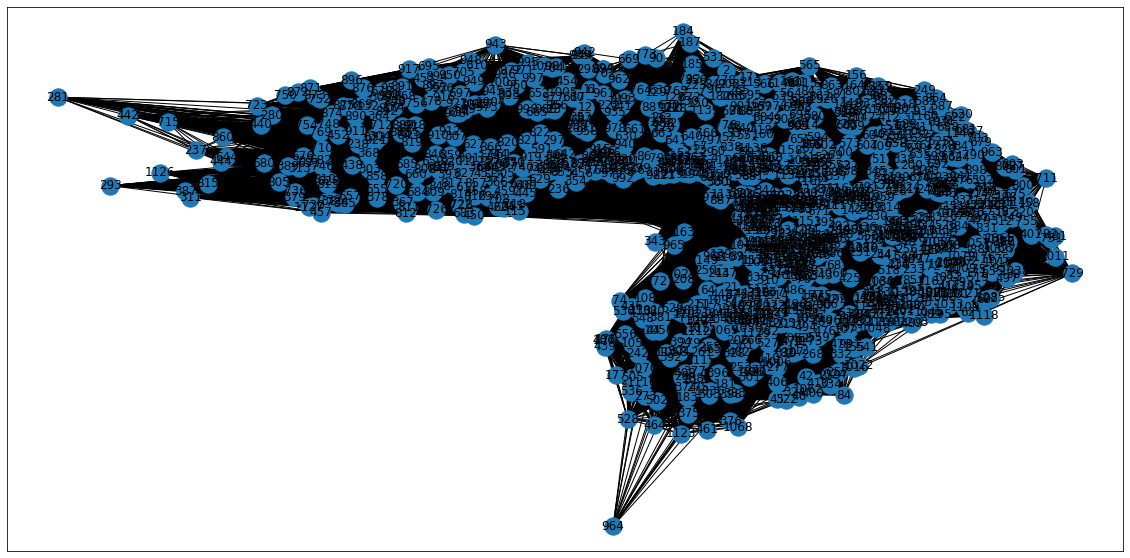

In [115]:
plt.figure(figsize=(20,10))
nx.draw_networkx(df, with_labels=True)

In [116]:
shortest_path_distance = nx.dijkstra_path(df, source=626, target=367, weight='mean_travel_time')
shortest_path_distance

[626, 795, 216, 683, 629, 846, 367]

**Json with coorsd & ids**

In [117]:
with open('miami_censustracts.json') as f:
    data_raw = json.load(f)

In [118]:
data_raw

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'GEOID': '12011020411',
    'TRACTCE': '020411',
    'NAME': '204.11',
    'MOVEMENT_ID': '1',
    'DISPLAY_NAME': 'Census Tract 204.11'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-80.273974, 26.218793],
      [-80.273905, 26.219458],
      [-80.27379, 26.2199],
      [-80.273686, 26.220226],
      [-80.273542, 26.220616],
      [-80.273168, 26.221309],
      [-80.27329, 26.22137],
      [-80.272974, 26.221809],
      [-80.27278, 26.222047],
      [-80.272345, 26.222486],
      [-80.271735, 26.22301],
      [-80.270757, 26.223782],
      [-80.270427, 26.224089],
      [-80.27011, 26.224481],
      [-80.269908, 26.224873],
      [-80.269774, 26.225411],
      [-80.269739, 26.225792],
      [-80.269833, 26.22885],
      [-80.269836, 26.229691],
      [-80.266334, 26.229724],
      [-80.264464, 26.229763],
      [-80.262998, 26.22977],
      [-80.260497, 26.229811],
      [-80.26037, 26.22976

In [119]:
json_data = {}
centroids = []

for feature in data_raw['features']:
    key = feature['properties']['MOVEMENT_ID']
    value = feature['geometry']['coordinates']
    json_data[key] = value
    
    poly = Polygon(value[0])
    centroids.append(poly.centroid.coords[0])

In [120]:
json_data

{'1': [[[-80.273974, 26.218793],
   [-80.273905, 26.219458],
   [-80.27379, 26.2199],
   [-80.273686, 26.220226],
   [-80.273542, 26.220616],
   [-80.273168, 26.221309],
   [-80.27329, 26.22137],
   [-80.272974, 26.221809],
   [-80.27278, 26.222047],
   [-80.272345, 26.222486],
   [-80.271735, 26.22301],
   [-80.270757, 26.223782],
   [-80.270427, 26.224089],
   [-80.27011, 26.224481],
   [-80.269908, 26.224873],
   [-80.269774, 26.225411],
   [-80.269739, 26.225792],
   [-80.269833, 26.22885],
   [-80.269836, 26.229691],
   [-80.266334, 26.229724],
   [-80.264464, 26.229763],
   [-80.262998, 26.22977],
   [-80.260497, 26.229811],
   [-80.26037, 26.22976],
   [-80.26035, 26.229812],
   [-80.259912, 26.229817],
   [-80.25977, 26.22976],
   [-80.256992, 26.229847],
   [-80.255386, 26.229862],
   [-80.25447, 26.22976],
   [-80.253721, 26.229827],
   [-80.253656, 26.229817],
   [-80.253464, 26.229865],
   [-80.252844, 26.229926],
   [-80.2528, 26.229003],
   [-80.252549, 26.218553],
   [-8

In [121]:
json_df_data = {'ID': json_data.keys(), 'centroids': centroids, 'borders': json_data.values()}

In [122]:
df_json =  pd.DataFrame.from_dict(json_df_data)
df_json.head()

ID                                 centroids  \
0  1   (-80.26197475766394, 26.21907378630789)   
1  2   (-80.08806097355597, 26.29788020516892)   
2  3  (-80.23834885556802, 25.976881475700093)   
3  4   (-80.1134533468378, 26.301056696723208)   
4  5  (-80.16158006286909, 26.322804395113184)   

                                             borders  
0  [[[-80.273974, 26.218793], [-80.273905, 26.219...  
1  [[[-80.095111, 26.292096], [-80.092947, 26.305...  
2  [[[-80.247088, 25.981572], [-80.245609, 25.981...  
3  [[[-80.121393, 26.297926], [-80.120632, 26.300...  
4  [[[-80.170149, 26.327781], [-80.169859, 26.327...

# Miami from OpenStreetMap

In [123]:
G_miami = ox.graph_from_place('Miami', network_type='drive')

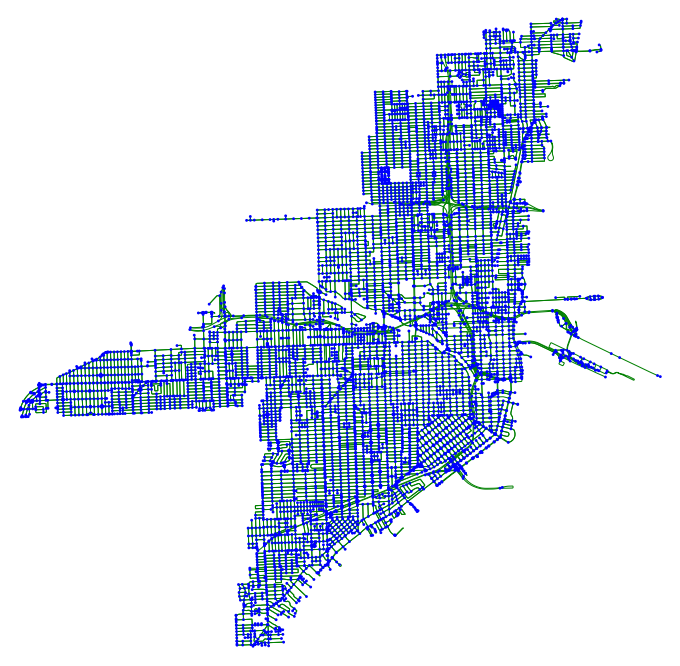

(<Figure size 864x864 with 1 Axes>, <AxesSubplot:>)

In [124]:
ox.plot_graph(G_miami, figsize=(12,12), node_size=8, bgcolor='w', node_color='b', edge_color='g')

**Generate 10 shop points and one base point. 11 total**

In [125]:
points, coords = generate_points()

In [126]:
print(points)
print("Total number of points = ", len(points))

[99323018, 384021445, 99163720, 7082077489, 384021449, 99242617, 99102100, 99311957, 99102077, 99319373, 99102053]
Total number of points =  11


**Solve TSP with simplex method.**

linprog(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None, bounds=None, method='interior-point', callback=None, options=None, x0=None)

In [127]:
node_number = 11

In [128]:
# Base graph (11x11) only for our 11 points. 
#1 where connection can exists and 0 otherwise(node 2 cant go to same node 2)
G = np.zeros((node_number, node_number))
for i in range(0, node_number):
    for j in range(0, node_number):
        if (i != j):
            G[i,j] = 1

print(G.shape)
G

(11, 11)


array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.]])

**Weight == length**

In [129]:
costs  = []
for i in range(0, node_number):
    for j in range(0, node_number):
        if (i != j):
            costs.append(nx.shortest_path_length(G_miami,source=points[i],
                         target=points[j], weight='length', method='dijkstra'))

In [130]:
costs = np.array(costs)

print(len(costs))
costs

110


array([20374.465, 16021.799, 20939.889, 20439.333,   515.476,   909.233,
       19522.191,   474.062, 20800.252, 20813.56 , 20202.214,  6934.611,
        2126.019,   298.89 , 20333.373, 20727.13 ,  2626.524, 20510.098,
        1986.382,   790.288, 16021.816,  6945.57 ,  7558.959,  7010.438,
       16152.975, 16546.732,  5236.157, 16329.7  ,  7419.322,  7384.665,
       20754.292,  2022.102,  7543.843,  1936.626, 20885.451, 21279.208,
        3603.279, 21062.176,   139.637,  2206.888, 20270.05 ,   301.858,
        7002.447,  2064.004, 20401.209, 20794.966,  2694.36 , 20577.934,
        1924.367,   511.507,   515.476, 20505.624, 16152.958, 21071.048,
       20570.492,   495.151, 19653.35 ,   823.36 , 20931.411, 20944.719,
         909.233, 20899.381, 16546.715, 21464.805, 20964.249,   495.151,
       20047.107,  1217.117, 21325.168, 21338.476, 19259.588,  3100.919,
        5026.404,  3714.308,  3165.787, 19390.747, 19784.504, 19567.472,
        3574.671,  3540.014,   474.062, 20682.349, 

In [131]:
Aeq = Aeq_constraints(G)
Aeq

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [132]:
beq = np.ones(2 * node_number) #Each element of A_eq @ x must equal the corresponding element of b_eq

In [133]:
bounds = tuple([(0, 1) for i in range(0, (node_number * node_number - node_number))])
# A sequence of (min, max) pairs for each element in x, defining the minimum and maximum values 
# of that decision variable. 0 and 1 in our case

In [134]:
res = linprog(c=costs, A_eq=Aeq, b_eq=beq, bounds=bounds, method='simplex')

print(res)

     con: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])
     fun: 14083.914
 message: 'Optimization terminated successfully.'
     nit: 542
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0.])


In [135]:
print("Min distance == ", res.fun)

Min distance ==  14083.914


In [136]:
connections = connections_matrix(res)

       0    1    2    3    4    5    6    7    8    9   10
 0 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
 1 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
 2 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
 3 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
 4 : [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 5 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
 6 : [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 7 : [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 8 : [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 9 : [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
10 : [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [137]:
path_indices = get_path_indices(connections)
path_indices.append(0) # back to sourse
path_indices

[0, 8, 1, 10, 4, 2, 7, 3, 9, 5, 6, 0]

In [138]:
path = []
for i in path_indices:
    path.append(points[i])
    
print("Initial points ==", points)
print("Path ==", path)

Initial points == [99323018, 384021445, 99163720, 7082077489, 384021449, 99242617, 99102100, 99311957, 99102077, 99319373, 99102053]
Path == [99323018, 99102077, 384021445, 99102053, 384021449, 99163720, 99311957, 7082077489, 99319373, 99242617, 99102100, 99323018]


In [139]:
routes_pairs = []
for i in range(len(path)-1):
    routes_pairs.append([path[i], path[i+1]])
    
print(routes_pairs)
print("Number of point pairs :", len(routes_pairs))

[[99323018, 99102077], [99102077, 384021445], [384021445, 99102053], [99102053, 384021449], [384021449, 99163720], [99163720, 99311957], [99311957, 7082077489], [7082077489, 99319373], [99319373, 99242617], [99242617, 99102100], [99102100, 99323018]]
Number of point pairs : 11


In [140]:
route_list = []

for r in routes_pairs:
    route_list.append(nx.shortest_path(G_miami, source=r[0], target=r[1], weight='length', method='dijkstra'))

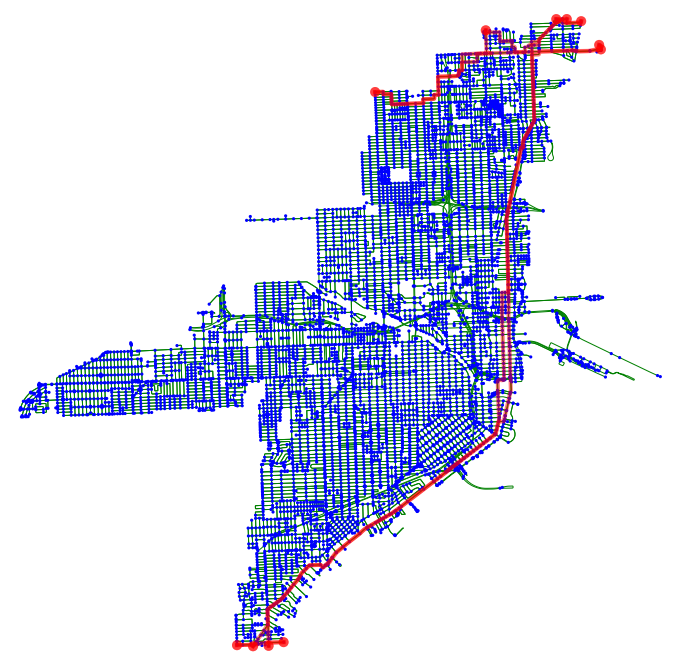

In [141]:
fig, ax = ox.plot_graph_routes(G_miami, route_list, figsize=(12,12), save=True, show=False, close=False, 
                               edge_linewidth=1, node_size=10, bgcolor='w', node_color='b', edge_color='g',
                               route_color = 'r')
plt.show()

**Weight == travel time**

In [142]:
G_temp = ox.add_edge_speeds(G_miami)
G_miami = ox.add_edge_travel_times(G_temp)

In [143]:
edges = ox.graph_to_gdfs(G_miami, nodes=False)
edges['highway'] = edges['highway'].astype(str)
edges.groupby('highway')[['length', 'speed_kph', 'travel_time']].mean().round(1)

length  speed_kph  travel_time
highway                                                        
['primary', 'secondary']           30.7       56.4          2.0
['trunk', 'motorway']             240.6       72.4         12.0
['unclassified', 'residential']   462.9       43.5         38.3
living_street                      97.0       56.1          6.2
motorway                          627.8       85.6         27.1
motorway_link                     320.1       68.7         16.6
primary                            97.8       56.4          6.3
primary_link                       42.7       56.1          2.7
residential                       116.5       45.7          9.2
secondary                          84.7       57.9          5.3
secondary_link                     48.8       64.4          2.7
tertiary                           99.1       46.1          7.7
tertiary_link                      95.7       28.2         12.2
trunk                             308.4       64.3         17.3
trunk_link                        108.0       56.1          6.9
unclassified                       88.5       43.5          7.4

In [144]:
costs  = []
for i in range(0, node_number):
    for j in range(0, node_number):
        if (i != j):
            costs.append(nx.shortest_path_length(G_miami,source=points[i],
                         target=points[j], weight='travel_time', method='dijkstra'))

In [145]:
costs = np.array(costs)

print(len(costs))
costs

110


array([1134.9,  989.4, 1156.8, 1140. ,   39.7,   71.5, 1014.3,   37.3,
       1145.8, 1169.6, 1122.5,  472.8,  152.5,   23.5, 1122. , 1153.8,
        178.9, 1146.8,  141.5,   62.2,  979.4,  491.2,  513.1,  496.3,
        978.9, 1010.7,  370.6, 1003.7,  502.1,  525.9, 1153.4,  142.1,
        503.7,  135.4, 1152.9, 1184.7,  229.9, 1177.7,   11. ,  156.9,
       1127.8,   23.7,  478.1,  147.7, 1127.3, 1159.1,  184.2, 1152.1,
        136.7,   40.4,   39.7, 1134.4,  988.9, 1156.3, 1139.5,   38.2,
       1013.8,   64. , 1145.3, 1169.1,   71.5, 1166.2, 1020.7, 1188.1,
       1171.3,   38.2, 1045.6,   95.8, 1177.1, 1200.9,  999.4,  223.7,
        349.7,  245.6,  228.8,  998.9, 1030.7, 1023.7,  234.6,  258.4,
         37.3, 1159.2, 1013.7, 1181.1, 1164.3,   64. ,   95.8, 1038.6,
       1170.1, 1193.9, 1142.4,  131.1,  492.7,   11. ,  124.4, 1141.9,
       1173.7,  218.9, 1166.7,  145.9, 1157.2,   63.4,  507.5,  168.5,
         40.4, 1156.7, 1188.5,  213.6, 1181.5,  157.5])

In [146]:
Aeq = Aeq_constraints(G)
Aeq

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [147]:
beq = np.ones(2 * node_number) #Each element of A_eq @ x must equal the corresponding element of b_eq

In [148]:
bounds = tuple([(0, 1) for i in range(0, (node_number * node_number - node_number))])
# A sequence of (min, max) pairs for each element in x, defining the minimum and maximum values 
# of that decision variable. 0 and 1 in our case

In [149]:
res = linprog(c=costs, A_eq=Aeq, b_eq=beq, bounds=bounds, method='simplex')

print(res)

     con: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])
     fun: 1019.5999999999998
 message: 'Optimization terminated successfully.'
     nit: 542
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0.])


In [150]:
print("Min total travel time == ", res.fun)

Min total travel time ==  1019.5999999999998


In [151]:
connections = connections_matrix(res)

       0    1    2    3    4    5    6    7    8    9   10
 0 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
 1 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
 2 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
 3 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
 4 : [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 5 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
 6 : [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 7 : [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 8 : [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 9 : [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
10 : [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [152]:
path_indices = get_path_indices(connections)
path_indices.append(0) # back to sourse
path_indices

[0, 8, 1, 10, 4, 2, 7, 3, 9, 5, 6, 0]

In [153]:
path = []
for i in path_indices:
    path.append(points[i])
    
print("Initial points ==", points)
print("Path ==", path)

Initial points == [99323018, 384021445, 99163720, 7082077489, 384021449, 99242617, 99102100, 99311957, 99102077, 99319373, 99102053]
Path == [99323018, 99102077, 384021445, 99102053, 384021449, 99163720, 99311957, 7082077489, 99319373, 99242617, 99102100, 99323018]


In [154]:
routes_pairs = []
for i in range(len(path)-1):
    routes_pairs.append([path[i], path[i+1]])
    
print(routes_pairs)
print("Number of point pairs :", len(routes_pairs))

[[99323018, 99102077], [99102077, 384021445], [384021445, 99102053], [99102053, 384021449], [384021449, 99163720], [99163720, 99311957], [99311957, 7082077489], [7082077489, 99319373], [99319373, 99242617], [99242617, 99102100], [99102100, 99323018]]
Number of point pairs : 11


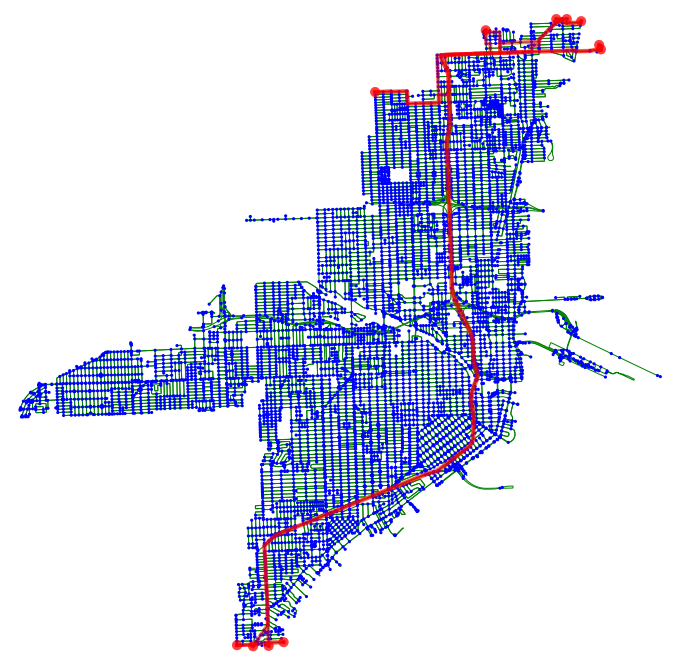

In [156]:
route_list = []

for r in routes_pairs:
    route_list.append(nx.shortest_path(G_miami, source=r[0], target=r[1], weight='travel_time', method='dijkstra'))
    
fig, ax = ox.plot_graph_routes(G_miami, route_list, figsize=(12,12), save=True, show=False, close=False, 
                               edge_linewidth=1, node_size=10, bgcolor='w', node_color='b', edge_color='g',
                               route_color = 'r')
plt.show()